<a href="https://colab.research.google.com/github/BMugo84/pytorch_in_25_hours/blob/main/pytorch03ComputerVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Computer-vision

![a PyTorch workflow with a computer vision focus](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-pytorch-computer-vision-workflow.png)

## 0. Computer vision libraries in PyTorch

Before we get started writing code, let's talk about some PyTorch computer vision libraries you should be aware of.

| PyTorch module | What does it do? |
| ----- | ----- |
| [`torchvision`](https://pytorch.org/vision/stable/index.html) | Contains datasets, model architectures and image transformations often used for computer vision problems. |
| [`torchvision.datasets`](https://pytorch.org/vision/stable/datasets.html) | Here you'll find many example computer vision datasets for a range of problems from image classification, object detection, image captioning, video classification and more. It also contains [a series of base classes for making custom datasets](https://pytorch.org/vision/stable/datasets.html#base-classes-for-custom-datasets). |
| [`torchvision.models`](https://pytorch.org/vision/stable/models.html) | This module contains well-performing and commonly used computer vision model architectures implemented in PyTorch, you can use these with your own problems. |
| [`torchvision.transforms`](https://pytorch.org/vision/stable/transforms.html) | Often images need to be transformed (turned into numbers/processed/augmented) before being used with a model, common image transformations are found here. |
| [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) | Base dataset class for PyTorch.  |
| [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#module-torch.utils.data) | Creates a Python iterable over a dataset (created with `torch.utils.data.Dataset`). |

> **Note:** The `torch.utils.data.Dataset` and `torch.utils.data.DataLoader` classes aren't only for computer vision in PyTorch, they are capable of dealing with many different types of data.

Now we've covered some of the most important PyTorch computer vision libraries, let's import the relevant dependencies.



In [ ]:
# import pytorch
import torch
from torch import nn

# import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# import matplotlib for visualization
import matplotlib.pyplot as plt

# check versions
print(torch.__version__)
print(torchvision.__version__)

2.3.0+cu121
0.18.0+cu121


## 01. Getting a Dataset from FashionMNIST



To begin working on a computer vision problem, let's get a computer vision dataset.

We're going to start with FashionMNIST.

MNIST stands for Modified National Institute of Standards and Technology.

The [original MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database) contains thousands of examples of handwritten digits (from 0 to 9) and was used to build computer vision models to identify numbers for postal services.

[FashionMNIST](https://github.com/zalandoresearch/fashion-mnist), made by Zalando Research, is a similar setup.

Except it contains grayscale images of 10 different kinds of clothing.

![example image of FashionMNIST](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-fashion-mnist-slide.png)
*`torchvision.datasets` contains a lot of example datasets you can use to practice writing computer vision code on. FashionMNIST is one of those datasets. And since it has 10 different image classes (different types of clothing), it's a multi-class classification problem.*

Later, we'll be building a computer vision neural network to identify the different styles of clothing in these images.

PyTorch has a bunch of common computer vision datasets stored in `torchvision.datasets`.

Including FashionMNIST in [`torchvision.datasets.FashionMNIST()`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html).

To download it, we provide the following parameters:
* `root: str` - which folder do you want to download the data to?
* `train: Bool` - do you want the training or test split?
* `download: Bool` - should the data be downloaded?
* `transform: torchvision.transforms` - what transformations would you like to do on the data?
* `target_transform` - you can transform the targets (labels) if you like too.

Many other datasets in `torchvision` have these parameter options.

In [ ]:
# setup training data
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root="data",    # where to donload data
    train=True,     # train or test dataset
    download=True,  # download now?
    transform=torchvision.transforms.ToTensor(),    # How to transform the data
    target_transform=None   # how do we want to transform the labels
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

100%|██████████| 26421880/26421880 [00:05<00:00, 4892723.34it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 146152.05it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 2723051.04it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 6192221.68it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
# See first training sample
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_names = train_data.classes
class_names


['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
# check the shape of our data
print("Image shape ie [color channel, height, width]: ",image.shape)

Image shape ie [color channel, height, width]:  torch.Size([1, 28, 28])


###  Visualizing our data


![example input and output shapes of the fashionMNIST problem](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-computer-vision-input-and-output-shapes.png)

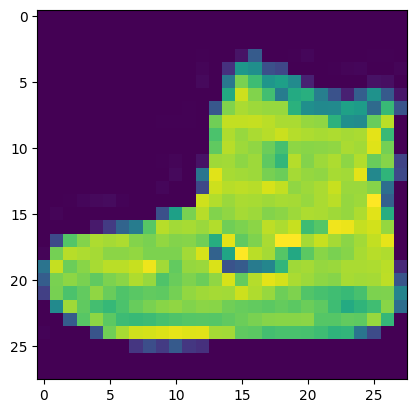

In [ ]:
import matplotlib.pyplot as plt

image, label = train_data[0]
# plt.imshow(image)# causes an eror since it is an ivalid shape as per matplotlib
plt.imshow(image.squeeze())

Text(0.5, 1.0, 'Ankle boot')

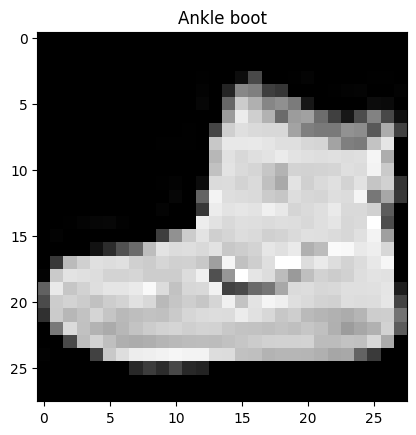

In [ ]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])


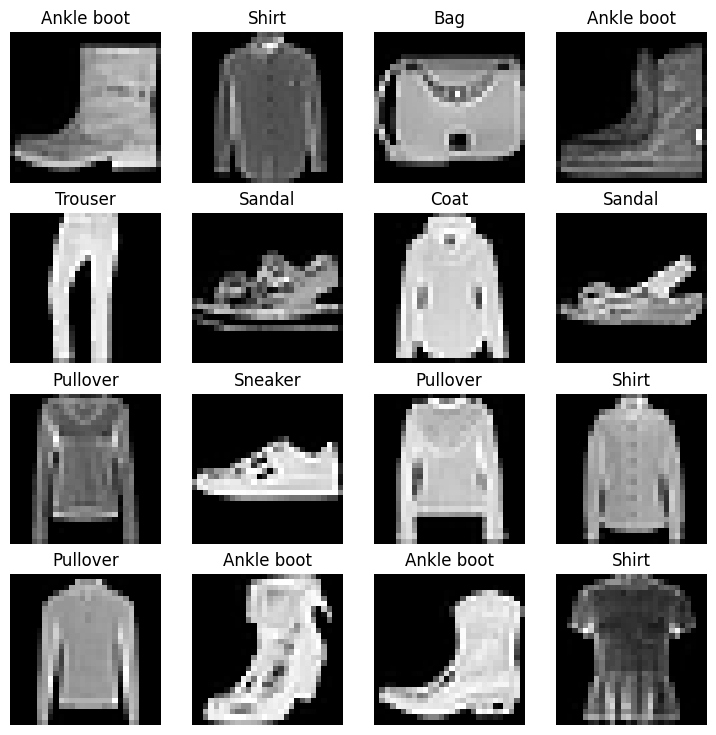

In [ ]:
# plot more images at random
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

## 02. Preparing Dataloader



Now we've got a dataset ready to go.

The next step is to prepare it with a [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) or `DataLoader` for short.

The `DataLoader` does what you think it might do.

It helps load data into a model.

For training and for inference.

It turns a large `Dataset` into a Python iterable of smaller chunks.

These smaller chunks are called **batches** or **mini-batches** and can be set by the `batch_size` parameter.

Why do this?

Because it's more computationally efficient.

In an ideal world you could do the forward pass and backward pass across all of your data at once.

But once you start using really large datasets, unless you've got infinite computing power, it's easier to break them up into batches.

It also gives your model more opportunities to improve.

With **mini-batches** (small portions of the data), gradient descent is performed more often per epoch (once per mini-batch rather than once per epoch).

What's a good batch size?

[32 is a good place to start](https://twitter.com/ylecun/status/989610208497360896?s=20&t=N96J_jotN--PYuJk2WcjMw) for a fair amount of problems.

But since this is a value you can set (a **hyperparameter**) you can try all different kinds of values, though generally powers of 2 are used most often (e.g. 32, 64, 128, 256, 512).

![an example of what a batched dataset looks like](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-batching-fashionmnist.png)
*Batching FashionMNIST with a batch size of 32 and shuffle turned on. A similar batching process will occur for other datasets but will differ depending on the batch size.*

Let's create `DataLoader`'s for our training and test sets.

**Why Do We Turn Our Data into Batches?**

Batching is the process of dividing our data into smaller subsets, allowing us to process multiple samples simultaneously. This is akin to viewing multiple memes in a grid on your phone's gallery and selecting the funniest one.

**Advantages of Batching:**
1. **Computational Efficiency:** Processing data in batches is more efficient than handling one sample at a time.
2. **Gradient Updates:** Batching allows our neural network to update its gradients multiple times per epoch, leading to more stable and faster convergence.

**Example:**
When training a neural network, sending batches of images to the computing hardware enables the model to learn from multiple samples simultaneously, improving performance and speed.

In [ ]:
from torch.utils.data import DataLoader

# create batch size hyperparameter
BATCH_SIZE = 32

# turn train dataset into dataloader
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)
len(train_dataloader)

1875

In [ ]:
# check out the images inside the batches
train_features_batch, train_labels_batch = next(iter(train_dataloader)) #  retrieves the next batch of data from this iterator.
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

torch.Size([1, 28, 28]) 6


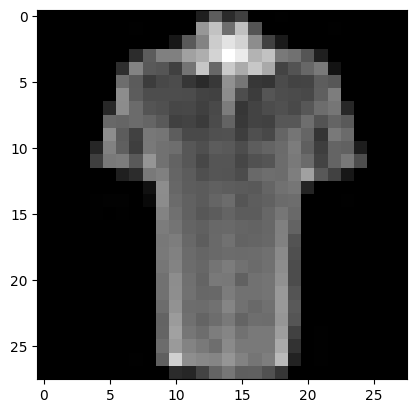

In [ ]:
# visualize
len(train_dataloader)
# show a sample
torch.manual_seed(42)
random_idx = torch.randint(low=0,
                           high=len(train_features_batch),
                           size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
print(img.shape, label.item())



## 03. Model 0: Build a baseline model

### 03. Baseline model

**What is a baseline model?**

A baseline model is a simple, initial model used to measure the performance of
 more complex models. It serves as a reference point to see if subsequent models
  improve. Start with a simple model and gradually add complexity as you go.

In [ ]:
# create a flatten layer
flatten_model = nn.Flatten()

# get a simple sample
x = train_features_batch[0]

# flatten the sample
output = flatten_model(x)

print(f"Shape before flattening: {x.shape}")
print(f"Shape after flattening: {output.shape}")

Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


In [ ]:
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_features,
                      out_features=hidden_units
                      ),
            nn.Linear(in_features=hidden_units,
                      out_features=output_features
                      )
        )
    def forward(self, x):
        return self.layer_stack(x)

In [ ]:
model_0 = FashionMNISTModelV0(
    input_features=784,
    output_features=len(class_names),
    hidden_units=10
).to("cpu")
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[ 0.4283,  0.1136, -0.3903, -0.0246, -0.0698,  0.2508,  0.4007, -0.4172,
         -0.0264, -0.2463]], grad_fn=<AddmmBackward0>)

### 3.1. Set up loss function and evaluation metrics

We will use `nn.CrossEntropyLoss` since we are dealing with multiclass data.

- **Optimizer**: Stochastic Gradient Descent (SGD)
- **Evaluation Metric**: Accuracy

In [ ]:
!pip install torchmetrics
from torchmetrics import Accuracy
accuracy_fn = Accuracy(task="multiclass", num_classes=len(class_names))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 18.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

In [ ]:
# setup loss fn and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)


### 3.2. Timing our experiments ie how fast it runs

In [ ]:
from timeit import default_timer as timer

def print_train_time(start: float, end: float, device: torch.device = None):
    """
    Calculates and prints the total training time.

    Args:
    start (float): The start time of the training.
    end (float): The end time of the training.
    device (torch.device, optional): The device on which the training was run.

    Returns:
    float: The total training time in seconds.
    """
    total_time = end - start  # Calculate total training time
    print(f"Train time on {device}: {total_time:.3f} seconds")  # Print the training time
    return total_time  # Return the total training time


### 3.3. creating a training loop and a training model

* Loop through epochs
* Loop through training batches
* Loop through testing batches
* Print out what's happening
* Time it all


In [ ]:
# import tqdm for progress bar
from tqdm.auto import tqdm

# set the seed and start the timer
torch.manual_seed(42)
train_timer_start_on_cpu = timer()

# set the number of epochs
epochs = 3

# create training and testing loop
# for an epoch in a range:
for epoch in range(epochs):
    print(f"Epoch: {epoch}\n---------")
    train_loss = 0
    # add aloop to trainthrough the batches
    for batch, (X, y) in enumerate(train_dataloader):
        # in model.train
        model_0.train()
        # do the forward pass
        y_pred = model_0(X)
        # calculate the loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        # optimizer zero grad
        optimizer.zero_grad()
        # loss backwards
        loss.backward()
        # optimizer step step
        optimizer.step()
        # print out whats happening
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")
    # divide total train loss by length of train dataloader
    train_loss /= len(train_dataloader)
    # lets test it
    test_loss, test_acc = 0, 0
    # in model.eval
    model_0.eval()
    # with torch.inference_mode:
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            # do the forward pass
            test_pred = model_0(X_test)
            # calculate the loss
            test_loss += loss_fn(test_pred, y_test)
            test_acc += accuracy_fn(preds=test_pred.argmax(dim=1),
                                    target=y_test)
        # calculate test loss average per batch
        test_loss /= len(test_dataloader)
        # calculate accuracy
        test_acc /= len(test_dataloader)
    # print out whats happening
    print(f"\nTrain loss: {train_loss:.4f}  |   Test loss:{test_loss:.4f}, Test acc: {(test_acc*100):.4f}")

# Calculate training time
train_timer_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_timer_start_on_cpu,
                                            end=train_timer_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))


Epoch: 0
---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.5948  |   Test loss:0.5164, Test acc: 81.8391
Epoch: 1
---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.4795  |   Test loss:0.4814, Test acc: 83.1769
Epoch: 2
---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.4570  |   Test loss:0.4777, Test acc: 83.4964
Train time on cpu: 38.232 seconds


### 3.4. Make predictions and get Model 0 results

In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    """
    Evaluates the given model on the provided data loader using the specified loss and accuracy functions.

    Args:
    model (torch.nn.Module): The model to be evaluated.
    data_loader (torch.utils.data.DataLoader): DataLoader containing the data to evaluate the model on.
    loss_fn (torch.nn.Module): The loss function to use for evaluation.
    accuracy_fn: The function to calculate accuracy.

    Returns:
    dict: A dictionary containing the model name, average loss, and average accuracy.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            # Forward pass
            y_pred = model(X)

            # Calculate loss and accuracy
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(preds=y_pred.argmax(dim=1), target=y)

        # Average the loss and accuracy
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {
        "model_name": model.__class__.__name__,
        "model_loss": loss.item(),
        "model_acc": acc.item()*100
    }


# calculate model 0 results on test datasets
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_0_results


  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4777321219444275,
 'model_acc': 83.49640369415283}

## 4. Setup device agnostic code

In [ ]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
torch.cuda.is_available()

True

## 5. Model_1: building a better model with non-linearity

In [ ]:
# create a model with non-linear+ relu
class FashionMNISTModelV1(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            # nn.ReLU(),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape),
            # nn.ReLU()
        )
    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)



In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_1 = FashionMNISTModelV1(input_shape=784,
                             hidden_units=10,
                             output_shape=len(class_names)
).to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### 5.1. setup loss, optimizer and evaluation metrics

In [ ]:
# setup loss fn and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [ ]:
!pip install torchmetrics
from torchmetrics import Accuracy
accuracy_fn = Accuracy(task="multiclass", num_classes=len(class_names)).to(device)

### 5.2. make a function for our training and testin loop ie train step and test step

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    """
    Performs a single training step (epoch) for a given model.

    Args:
    model (torch.nn.Module): The model to be trained.
    data_loader (torch.utils.data.DataLoader): DataLoader containing the training data.
    loss_fn (torch.nn.Module): The loss function to be used during training.
    optimizer (torch.optim.Optimizer): The optimizer to update the model parameters.
    accuracy_fn (function): Function to calculate the accuracy of the model's predictions.
    device (torch.device): The device on which the training will be performed (default is the current device).

    Returns:
    None: Prints the average training loss and accuracy after the epoch.
    """
    train_loss, train_acc = 0, 0
    model.to(device)
    # model.train()

    # Loop through the training batches
    for batch, (X, y) in enumerate(data_loader):
        # Move data to the target device
        X, y = X.to(device), y.to(device)
        # Perform the forward pass
        y_pred = model(X)
        # Calculate the loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(preds=y_pred.argmax(dim=1), target=y)
        # Zero the gradients
        optimizer.zero_grad()
        # Perform backpropagation
        loss.backward()
        # Update the model parameters
        optimizer.step()

    # Compute the average training loss and accuracy
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f" Train loss: {train_loss:.5f}   |    Train acc: {train_acc:.2f}")


In [ ]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    """
    Performs a single evaluation step on the test dataset for a given model.

    Args:
    model (torch.nn.Module): The model to be evaluated.
    data_loader (torch.utils.data.DataLoader): DataLoader containing the test data.
    loss_fn (torch.nn.Module): The loss function to be used during evaluation.
    accuracy_fn (function): Function to calculate the accuracy of the model's predictions.
    device (torch.device): The device on which the evaluation will be performed (default is the current device).

    Returns:
    None: Prints the average test loss and accuracy after the evaluation.
    """

    test_loss, test_acc = 0, 0
    model.to(device)
    # Set the model to evaluation mode
    model.eval()
    # Disable gradient calculation for inference
    with torch.inference_mode():
        for X, y in data_loader:
            # Move data to the target device
            X, y = X.to(device), y.to(device)
            # Perform the forward pass
            test_pred = model(X)
            # Calculate the loss
            test_loss += loss_fn(test_pred, y)
            # Calculate the accuracy
            test_acc += accuracy_fn(preds=test_pred.argmax(dim=1), target=y)
        # Compute the average test loss
        test_loss /= len(data_loader)
        # Compute the average test accuracy
        test_acc /= len(data_loader)
    # Print the test loss and accuracy
    print(f" Test loss: {test_loss:.5f}   |    Test acc: {test_acc:.2f}")


In [ ]:
!nvidia-smi

Fri Jun 21 23:23:54 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P0              28W /  70W |    105MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# import tqdm for progress bar
from tqdm.auto import tqdm

# set the seed and start the timer
torch.manual_seed(42)
torch.cuda.manual_seed(42)
# Measure time
from timeit import default_timer as timer
train_timer_start_on_gpu = timer()

# set the number of epochs
epochs = 3

# create training and testing loop
# for an epoch in a range:
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    # train the model
    train_step(model=model_1,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               )
    # test the model
    test_step(model=model_1,
               data_loader=test_dataloader,
               loss_fn=loss_fn,
               accuracy_fn=accuracy_fn,
               )

train_timer_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_timer_start_on_gpu,
                                            end=train_timer_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
 Train loss: 0.59039   |    Train acc: 0.79
 Test loss: 0.50954   |    Test acc: 0.82
Epoch: 1
---------
 Train loss: 0.47633   |    Train acc: 0.83
 Test loss: 0.47989   |    Test acc: 0.83
Epoch: 2
---------
 Train loss: 0.45503   |    Train acc: 0.84
 Test loss: 0.47664   |    Test acc: 0.83
Train time on cuda: 46.998 seconds


In [ ]:
# evaluating model_1
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device=device):
    """
    Evaluates the given model on the provided data loader using the specified loss and accuracy functions.

    Args:
    model (torch.nn.Module): The model to be evaluated.
    data_loader (torch.utils.data.DataLoader): DataLoader containing the data to evaluate the model on.
    loss_fn (torch.nn.Module): The loss function to use for evaluation.
    accuracy_fn: The function to calculate accuracy.

    Returns:
    dict: A dictionary containing the model name, average loss, and average accuracy.
    """
    loss, acc = 0, 0
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            X, y  = X.to(device), y.to(device)
            # Forward pass
            y_pred = model(X)

            # Calculate loss and accuracy
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(preds=y_pred.argmax(dim=1), target=y)

        # Average the loss and accuracy
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {
        "model_name": model.__class__.__name__,
        "model_loss": loss.item(),
        "model_acc": acc.item()*100
    }


In [ ]:


# calculate model 0 results on test datasets
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_1_results


  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651724815369}

## 6. Convolution Neural Network Model

### What model should I use?

> **Question:** Wait, you say CNN's are good for images, are there any other model types I should be aware of?

Good question.

This table is a good general guide for which model to use (though there are exceptions).

| **Problem type** | **Model to use (generally)** | **Code example** |
| ----- | ----- | ----- |
| Structured data (Excel spreadsheets, row and column data) | Gradient boosted models, Random Forests, XGBoost | [`sklearn.ensemble`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble), [XGBoost library](https://xgboost.readthedocs.io/en/stable/) |
| Unstructured data (images, audio, language) | Convolutional Neural Networks, Transformers | [`torchvision.models`](https://pytorch.org/vision/stable/models.html), [HuggingFace Transformers](https://huggingface.co/docs/transformers/index) |

> **Note:** The table above is only for reference, the model you end up using will be highly dependant on the problem you're working on and the constraints you have (amount of data, latency requirements).

Enough talking about models, let's now build a CNN that replicates the model on the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

![TinyVGG architecture, as setup by CNN explainer website](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-cnn-explainer-model.png)

To do so, we'll leverage the [`nn.Conv2d()`](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html) and [`nn.MaxPool2d()`](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html) layers from `torch.nn`.


https://poloclub.github.io/cnn-explainer/


1. **Padding**: Padding adds extra pixels around the edges of the input image, allowing the kernel to process edge pixels better. This helps preserve the spatial dimensions of the input image after convolution.

2. **Kernel Size**: The kernel (or filter) is the small matrix that slides over the image to extract features. A larger kernel covers more area, potentially capturing more context but may lose finer details. Smaller kernels capture more details but may require more computational resources.

3. **Stride**: Stride defines the number of pixels the kernel moves each step. A stride of 1 means the kernel moves one pixel at a time, which provides a detailed feature map. A stride of 2 or more moves the kernel faster, producing a smaller feature map and potentially speeding up computation but losing some detail.

### Summary

- **Padding**: Preserves border information by adding extra pixels around the input.
- **Kernel Size**: Determines the area covered by the filter, affecting the level of detail captured.
- **Stride**: Defines the movement step of the kernel, impacting the feature map size and computation speed.

In [ ]:
# Create a CNN model
class FashionMNISTModelV2(nn.Module):
    """
    A Convolutional Neural Network (CNN) model inspired by TinyVGG architecture.

    Args:
    input_shape (int): Number of input channels (e.g., 1 for grayscale images).
    hidden_units (int): Number of hidden units for the convolutional layers.
    output_units (int): Number of output units (e.g., number of classes).

    The model consists of:
    - Two convolutional blocks, each containing:
        - Two Conv2d layers followed by ReLU activation
        - A MaxPool2d layer for downsampling
    - A classifier block with:
        - A Flatten layer
        - A Linear layer mapping to the output units

    Forward Pass:
    - Passes input through conv_block_1 and conv_block_2
    - Flattens the output and passes through the classifier
    """
    def __init__(self, input_shape: int, hidden_units: int, output_units: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_units)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        return x


In [ ]:
model_2 = FashionMNISTModelV2(input_shape=1 ,
 hidden_units=10 ,
 output_units=len(class_names))
model_2


FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

### 6.1 Stepping through conv2d

In [ ]:
torch.manual_seed(42)

# create a batch of images
images = torch.randn(size=(32, 3, 64, 64))
images.shape

torch.Size([32, 3, 64, 64])

In [ ]:
test_image= images[0]
test_image.shape

torch.Size([3, 64, 64])

In [ ]:
# create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=1)
# pass data through the convolution layer
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 64, 64])

### 6.2 stepping through MaxPool

In [ ]:
test_image

tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.7978,  1.0261,  1.1465,  ...,  1.2134,  0.9354, -0.0780],
         [-1.4647, -1.9571,  0.1017,  ..., -1

In [ ]:
# create a single maxpool layer
maxpool_layer = nn.MaxPool2d(kernel_size=2)
# pass image through conv layer
test_image_conv2d = conv_layer(test_image)
print(test_image_conv2d.shape)
test_image_conv2d_maxpool = maxpool_layer(test_image_conv2d)
print(test_image_conv2d_maxpool.shape)

torch.Size([10, 64, 64])
torch.Size([10, 32, 32])


In [ ]:
# pass dummy image through our model
rand_image_tensor = torch.randn(size=(1, 28, 28))
rand_image_tensor.shape


test_image_vgg = model_2(rand_image_tensor.unsqueeze(0))
test_image_vgg

tensor([[-0.0422,  0.0013,  0.0288, -0.0926,  0.0885,  0.0093, -0.0636,  0.0927,
         -0.0401,  0.0259]], grad_fn=<AddmmBackward0>)

In [ ]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[-0.0730,  0.0673, -0.1623],
                        [ 0.1958,  0.2938, -0.2445],
                        [ 0.2897,  0.0624,  0.2463]]],
              
              
                      [[[ 0.0451,  0.1607, -0.0471],
                        [ 0.2570,  0.0493, -0.1556],
                        [ 0.0850, -0.1536, -0.0391]]],
              
              
                      [[[-0.1354,  0.2211, -0.2631],
                        [-0.1537, -0.0941, -0.2004],
                        [ 0.0315, -0.3292,  0.3010]]],
              
              
                      [[[-0.2832,  0.2573,  0.0555],
                        [-0.1082,  0.2060,  0.0520],
                        [ 0.2693,  0.0364, -0.1051]]],
              
              
                      [[[ 0.0896, -0.0904,  0.1403],
                        [ 0.2976,  0.1927, -0.1457],
                        [ 0.1924,  0.0596,  0.1693]]],
              
              
      

### 6.3 Loss Function and optimizer for model_2 cnn

In [ ]:
# setup loss fn and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

In [ ]:
!pip install torchmetrics
from torchmetrics import Accuracy
accuracy_fn = Accuracy(task="multiclass", num_classes=len(class_names)).to(device)

### 6.4 Training and testing model_2 using our training and test functions

In [ ]:
from timeit import default_timer as timer

def print_train_time(start: float, end: float, device: torch.device = None):
    """
    Calculates and prints the total training time.

    Args:
    start (float): The start time of the training.
    end (float): The end time of the training.
    device (torch.device, optional): The device on which the training was run.

    Returns:
    float: The total training time in seconds.
    """
    total_time = end - start  # Calculate total training time
    print(f"Train time on {device}: {total_time:.3f} seconds")  # Print the training time
    return total_time  # Return the total training time

In [ ]:
# import tqdm for progress bar
from tqdm.auto import tqdm
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# measure time
from timeit import default_timer as timer
train_timer_start_model_2 = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(model=model_2,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    test_step(model=model_2,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)
train_timer_end_model_2 = timer()
total_train_time_model_2 = print_train_time(end=train_timer_end_model_2,start=train_timer_start_model_2)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
 Train loss: 0.65864   |    Train acc: 0.76
 Test loss: 0.39039   |    Test acc: 0.86
Epoch: 1
---------
 Train loss: 0.36227   |    Train acc: 0.87
 Test loss: 0.34215   |    Test acc: 0.88
Epoch: 2
---------
 Train loss: 0.32664   |    Train acc: 0.88
 Test loss: 0.34149   |    Test acc: 0.88
Train time on None: 53.405 seconds


In [ ]:
# get model_2 results
model_2_results = eval_model(model=model_2,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)
model_2_results


  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3414860665798187,
 'model_acc': 87.77955174446106}

## 7. Comparing results


In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.477732,83.496404
1,FashionMNISTModelV1,0.476639,83.426517
2,FashionMNISTModelV2,0.341486,87.779552


In [ ]:
# add training time to results comparison
compare_results["training_time"] = [total_train_time_model_0,
                                  total_train_time_model_1,
                                  total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.477732,83.496404,38.232194
1,FashionMNISTModelV1,0.476639,83.426517,46.998294
2,FashionMNISTModelV2,0.341486,87.779552,53.404926


It looks like our CNN (`FashionMNISTModelV2`) model performed the best (lowest loss, highest accuracy) but had the longest training time.

And our baseline model (`FashionMNISTModelV0`) performed better than `model_1` (`FashionMNISTModelV1`).

### Performance-speed tradeoff

Something to be aware of in machine learning is the **performance-speed** tradeoff.

Generally, you get better performance out of a larger, more complex model (like we did with `model_2`).

However, this performance increase often comes at a sacrifice of training speed and inference speed.

> **Note:** The training times you get will be very dependant on the hardware you use.
>
> Generally, the more CPU cores you have, the faster your models will train on CPU. And similar for GPUs.
>
> Newer hardware (in terms of age) will also often train models faster due to incorporating technology advances.

How about we get visual?

Text(0, 0.5, 'model')

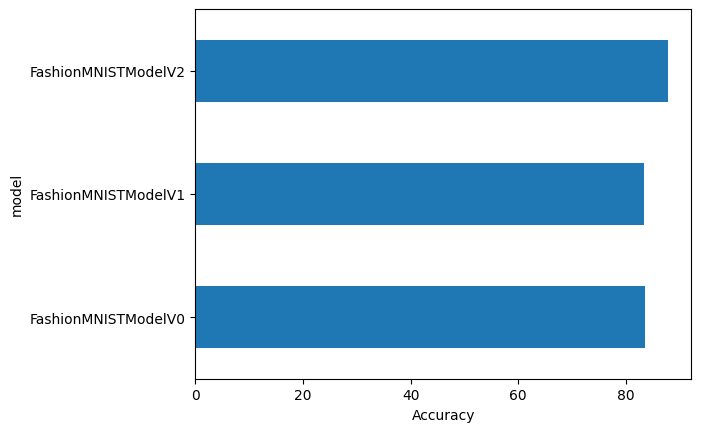

In [ ]:
# visualize our results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("Accuracy")
plt.ylabel("model")

## 8. Make and evaluate random predictions with the best model

**Understanding the Importance of Making Predictions in an ML Workflow**

Making predictions is a crucial part of the machine learning (ML) workflow for several reasons:

1. Model Evaluation: Predictions help assess the performance of your model. By comparing the predicted outcomes with the actual labels, you can determine how well your model is doing.
2. Real-World Application: The primary goal of training a model is to make predictions on new, unseen data. This step demonstrates the model's utility in real-world scenarios.
3. Error Analysis: By analyzing the predictions, you can identify patterns in errors, which can inform you on how to improve your model.
4. Visualization: Visualizing predictions helps in understanding the model's decision-making process and communicating results to stakeholders.

In [ ]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device=device):
    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # prepare the sample ( add a batch dimension and pass to target)
            sample = torch.unsqueeze(sample, dim=0).to(device)
            # forward pass
            pred_logit = model(sample)
            # get pred probs
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
            # get pred_prob off gpu to matplotlib(runs on cpu)
            pred_probs.append(pred_prob.cpu())
    return torch.stack(pred_probs)


In [ ]:
img, label = test_data[0]
img.shape, label

(torch.Size([1, 28, 28]), 9)

torch.Size([1, 28, 28])


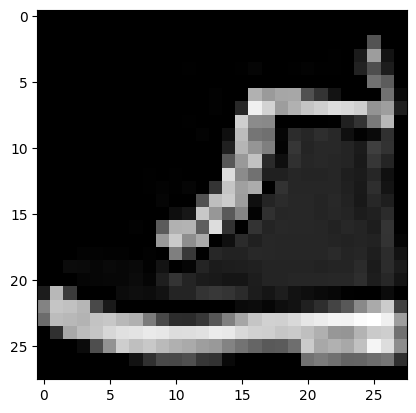

In [ ]:
import random
# random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# view the first sample shape
print(test_samples[0].shape)
# show first sample
plt.imshow(test_samples[0].squeeze(), cmap="gray")

In [ ]:
# make predidctions
pred_probs = make_predictions(model=model_2,
                              data=test_samples)
# visualize the first 2 pred probs
pred_probs[:2]

tensor([[6.0882e-05, 8.0146e-07, 1.6788e-05, 6.3303e-05, 3.1314e-06, 9.0425e-02,
         3.0637e-05, 3.6253e-02, 1.7514e-03, 8.7139e-01],
        [2.0058e-04, 1.0309e-06, 1.8490e-05, 1.3682e-05, 6.8922e-07, 1.4569e-03,
         2.7543e-05, 9.5066e-01, 1.3504e-04, 4.7486e-02]])

In [ ]:
# find the maximum of each pred_prob using argmax
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([9, 7, 2, 0, 1, 0, 3, 5, 4])

In [ ]:
test_labels

[9, 7, 2, 0, 1, 0, 4, 5, 4]

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

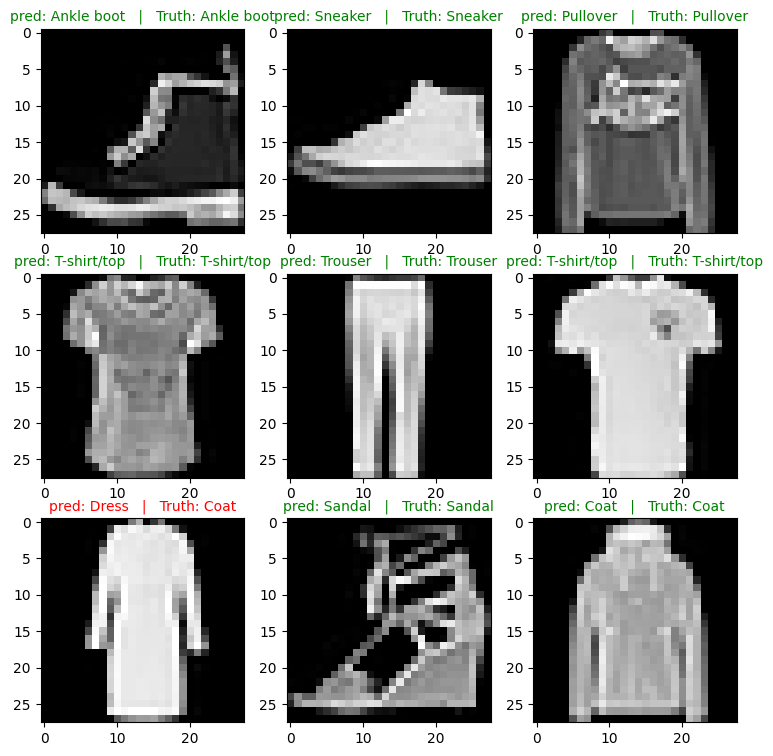

In [ ]:
# plot predictions
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i , sample in enumerate(test_samples):
    # create subplot
    plt.subplot(nrows, ncols, i+1)
    # plot target image
    plt.imshow(sample.squeeze(), cmap="gray")
    # find the prediction in txst form
    pred_label = class_names[pred_classes[i]]
    # get the truth label in text form
    truth_label = class_names[test_labels[i]]
    # create title for plot
    title_text = f"pred: {pred_label}   |   Truth: {truth_label}"

    # check for equality between pred and truth and change color of the titletext
    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c="g")
    else:
        plt.title(title_text, fontsize=10, c="r")


## 9. Making a confusion matrix for further prediction evaluation

steps:
1. make predictions with our trained model on the test dataset
2. make a confusion matrix using `torchmetrics.ConfusionMatrix`
3. plot the confusion matrix using mlxtend https://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/#overview
4.

In [ ]:
# import tqdm.auto
from tqdm.auto import tqdm

# make predictions with our trained model on the test dataset
y_preds = []
model_2.to(device)
model_2.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc="Making predictions..."):
        # send data to target device
        X, y = X.to(device), y.to(device)
        # do the forward pass
        y_logit = model_2(X)
        # turn logitts to pred_probs to pred_labels
        y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
        # put prediction on cpu for evaluation
        y_preds.append(y_pred.cpu())
# concatenate list of preds to a tensor
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]
# make a confusion matrix using torchmetrics.ConfusionMatrix
# plot the confusion matrix using mlxtend https://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/#overview

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
len(y_pred_tensor)

10000

In [ ]:
# make a confusion matrix using torchmetrics.ConfusionMatrix

try:
    import torchmetrics, mlxtend
    print(f"mlextend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__split(".")[1] >= 19, "mlxtend version should be 19 or higher")
except:
    !pip install -q torchmetrics -U mlxtend
    import torchmetrics, mlxtend
    print(f"mlextend version: {mlxtend.__version__}")



mlextend version: 0.22.0
mlextend version: 0.22.0


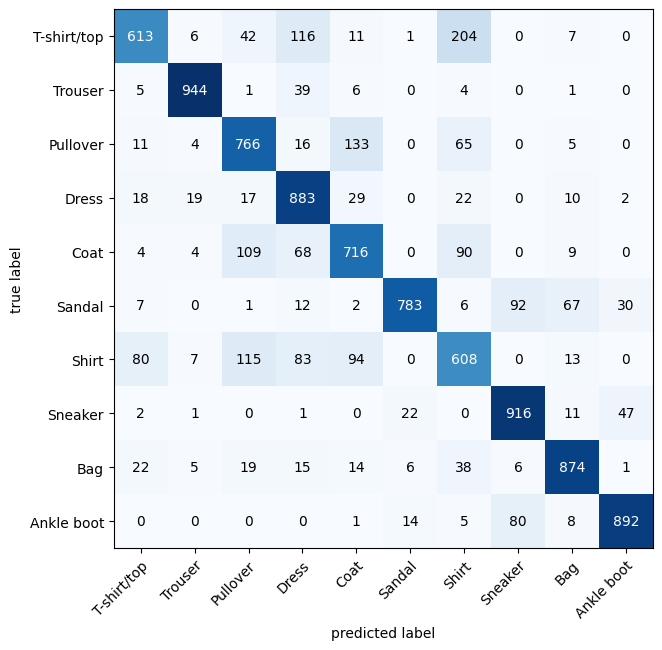

In [ ]:
# make a confusion matrix using torchmetrics.ConfusionMatrix
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(task="multiclass", num_classes=len(class_names))
confmat_tensor = confmat(preds = y_pred_tensor,
                         target=test_data.targets)
# plot confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10, 7)
)

 **Probable Errors Made by Our Model**

As seen in the confusion matrix, our model tends to make the following errors:

- **T-shirt/Top vs. Shirt**: 204 instances
- **Coat vs. Pullover**: 109/133 instances
- **Shirt vs. Pullover**: 115 instances
- **T-shirt vs. Dress**: 115 instances


## 10. Save and load best performing model

Let's finish this section off by saving and loading in our best performing model.

Recall from [notebook 01](https://www.learnpytorch.io/01_pytorch_workflow/#5-saving-and-loading-a-pytorch-model) we can save and load a PyTorch model using a combination of:
* `torch.save` - a function to save a whole PyTorch model or a model's `state_dict()`.
* `torch.load` - a function to load in a saved PyTorch object.
* `torch.nn.Module.load_state_dict()` - a function to load a saved `state_dict()` into an existing model instance.

You can see more of these three in the [PyTorch saving and loading models documentation](https://pytorch.org/tutorials/beginner/saving_loading_models.html).

For now, let's save our `model_2`'s `state_dict()` then load it back in and evaluate it to make sure the save and load went correctly.

In [ ]:
from pathlib import Path

# create model directory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)
# create model save
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# save he model state dict
print(f"Saving model to : {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to : models/03_pytorch_computer_vision_model_2.pth


In [ ]:
# loading the saved model
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_units=len(class_names))

# load the saved statedict
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# send model to target device
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
# evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)
loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3414860665798187,
 'model_acc': 87.77955174446106}

In [ ]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3414860665798187,
 'model_acc': 87.77955174446106}